# 1. Titanic Survival Prediction

#### Aim: To predict whether a passenger on the Titanic survived or not based on various features such as age, gender, class and more.

#### Import Necessary Libraries
     We need to import several python libraries 

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# check columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# check data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are total of 891 passengers in our dataset
- The 'Age' feature is missing 19.8% of its values. Guessing that the 'Age' feature is pretty important to survival, so we should probably attempt to fill these gaps.
- The 'Cabin' feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill these values so we drop these values.
- The 'Embarked' feature is missing 0.22% of its values so we fill that.

In [6]:
# handle the missing values
df['Age'].fillna(df['Age'].mean(),inplace=True)   # Age is numerical feature so we fill it by mean

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)   #Embarked is categorical feature so we fill it by mode

df.drop('Cabin',axis=1,inplace=True)

In [7]:
df.isnull().sum().sum()

0

In [8]:
# check duplicate values
df.duplicated().sum()

0

In [9]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
# EDA

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
corr_matrix=df.corr(numeric_only=True)

Text(0.5, 1.0, 'Correlation')

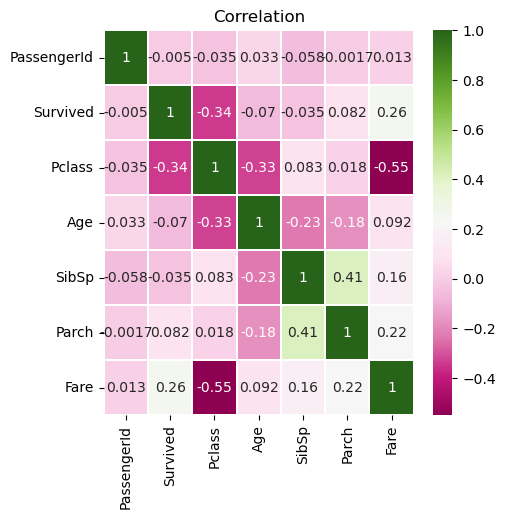

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(data=corr_matrix,annot=True,linewidths=0.2,cmap='PiYG')
plt.title('Correlation')

Possitive Correlation Features:
- Fair and Survived: 0.26

Negative Correlation Features:
- Fair and Pclass: -0.55
- Age and Pclass: -0.33
- Pclass and survived: -0.33 

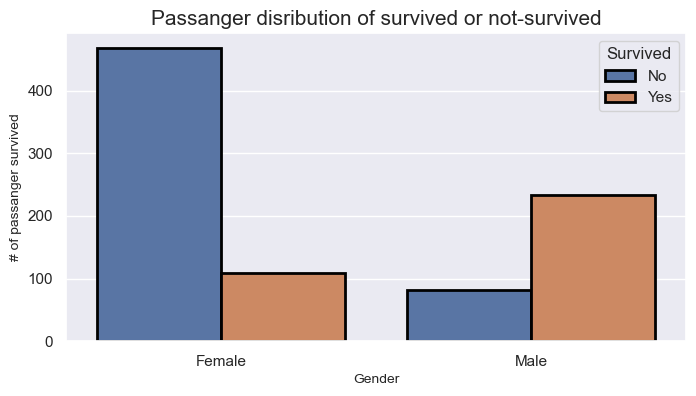

In [14]:
# Passenger distribution of survived vs not-survived
sns.set(style='darkgrid')
plt.subplots(figsize=(8,4))
ax=sns.countplot(x='Sex',data=df,hue='Survived',edgecolor=(0,0,0),linewidth=2)

#fitting xlabel,ylabel,title
plt.title('Passanger disribution of survived or not-survived',fontsize=15)
plt.ylabel('# of passanger survived',fontsize=10)
plt.xlabel('Gender',fontsize=10)
labels=['Female','Male']

#fitting xticks
plt.xticks(sorted(df.Survived.unique()),labels)

#fitting legends
leg=ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

This count plot shows the actual distribution of male and female passangers that survived are did not survived. It shows that among all the females ~230 survived and ~70 did not survive. while among male passangers ~110 survived and ~ 480 did not survive.

<Axes: xlabel='Age', ylabel='Density'>

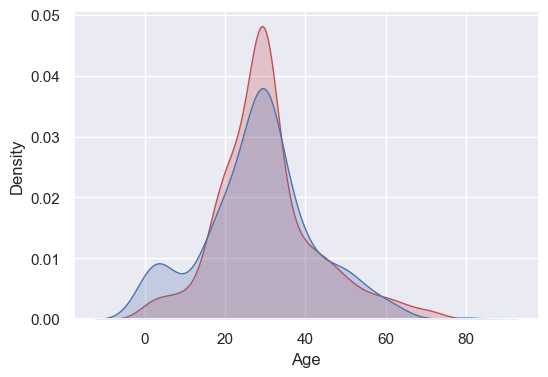

In [15]:
# Age and Survived
fig,axs=plt.subplots(figsize=(6,4))
sns.set_style(style='darkgrid')
sns.kdeplot(df.loc[(df['Survived']==0),'Age'],color='r',label='Not Survived',fill=True)
sns.kdeplot(df.loc[(df['Survived']==1),'Age'],color='b',label='Survived',fill=True)                   

There si nothing out of the ordinary about this plot, except the very left part of the distribution. It shows that children and infants were the priority.

<Axes: xlabel='Survived', ylabel='count'>

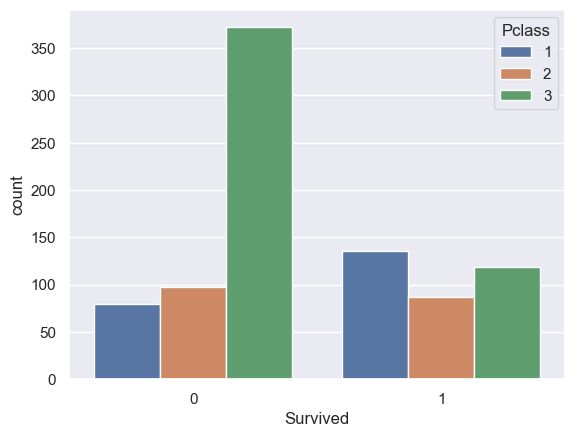

In [16]:
# count of survivals wrt pclass
sns.countplot(x=df['Survived'],hue=df['Pclass'])

In [ ]:
# Encoding the Categorical columns

In [17]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [18]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [19]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [20]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']

In [21]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [22]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)
X_sc=sc.transform(X)

In [24]:
# Split data into training and testing

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=11)

In [26]:
# Model 1- Logistic Regression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)
print(model1.score(X_test,y_test))   # score on testing data
print(model1.score(X_train,y_train)) #score on training data

0.8491620111731844
0.7823033707865169


In [27]:
# Predicting the Test set results
y_pred = model1.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[104  14]
 [ 13  48]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       118
           1       0.77      0.79      0.78        61

    accuracy                           0.85       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



Accuracy is  84.92 %
Precision is  0.77
Recall is  0.79


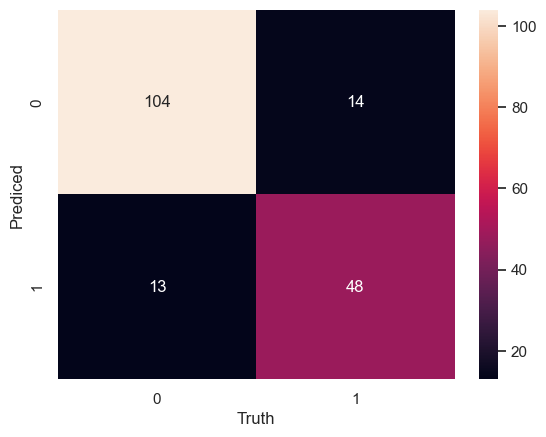

In [28]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Prediced')
plt.show()

In [51]:
# Model 2- Support Vector
from sklearn.svm import SVC
model2=SVC()
model2.fit(X_train,y_train)
print(model2.score(X_test,y_test))   # score on testing data
print(model2.score(X_train,y_train)) #score on training data

0.8715083798882681
0.8342696629213483


In [32]:
# Predicting the Test set results
y_pred = model2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[115   3]
 [ 20  41]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       118
           1       0.93      0.67      0.78        61

    accuracy                           0.87       179
   macro avg       0.89      0.82      0.85       179
weighted avg       0.88      0.87      0.87       179



Accuracy is  87.15 %
Precision is  0.93
Recall is  0.67


In [35]:
# Model 3- KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(X_train,y_train)
print(model3.score(X_test,y_test))   # score on testing data
print(model3.score(X_train,y_train)) #score on training data

0.8547486033519553
0.8370786516853933


In [36]:
# Predicting the Test set results
y_pred = model3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[108  10]
 [ 16  45]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       118
           1       0.82      0.74      0.78        61

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



Accuracy is  85.47 %
Precision is  0.82
Recall is  0.74


In [33]:
print(X)
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [47]:
Results=pd.DataFrame({'Model': ['Logistic Regression','Support Vector Machine','KNN'],
   'Accuracy Score': [84.92,87.15,85.47]})
Results

,Model,Accuracy Score
0,Logistic Regression,84.92
1,Support Vector Machine,87.15
2,KNN,85.47


Here Suport Vector Machine has highest accuracy score.

In [49]:
# Make some Predictions using SVM
import warnings
warnings.filterwarnings('ignore')

a=np.array([[2,0,27.0,0,0,13.0,0]])   #Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
a_sc=sc.transform(a)
Result=model2.predict(a_sc)


if (Result==0):
    print('So sorry! Not Survived')
else:
    print('Survived')

So sorry! Not Survived
